In [24]:
# Core Libraries for Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Read the file
df = pd.read_excel("default_of_credit_card_clients.xls", header=1)

In [26]:
# Show all columns
pd.set_option('display.max_columns', None)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
# Shape of the data
print(f'Data Shape: {df.shape}')

Data Shape: (30000, 25)


In [31]:
# Check and clean up column names if necessary.
print(f"Column Names: {df.columns[:]}")

Column Names: Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


Drop the 'ID' column. It's a unique identifier, not a feature for the model, and keeping it could lead to overfitting.

In [32]:
if 'ID' in df.columns:
    df = df.drop('ID', axis=1) 
    print("'ID' column removed.")
else:
    print("'ID' column not found.")

'ID' column removed.


In the UCI Credit Card Default Dataset, the target variable is originally named:

"default payment next month"

To make it shorter and easier to reference throughout the project, we rename this column to:

"DEFAULT"

This improves code readability and ensures consistent naming across scripts and models.

In [33]:
# Rename target variable
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)

In [34]:
# Display the updated column names.
print(f"Updated Column Names: {df.columns[:]}")

Updated Column Names: Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


In [35]:
# Check for missing values in each column.
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


No Missing value is present

In [37]:
# Data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

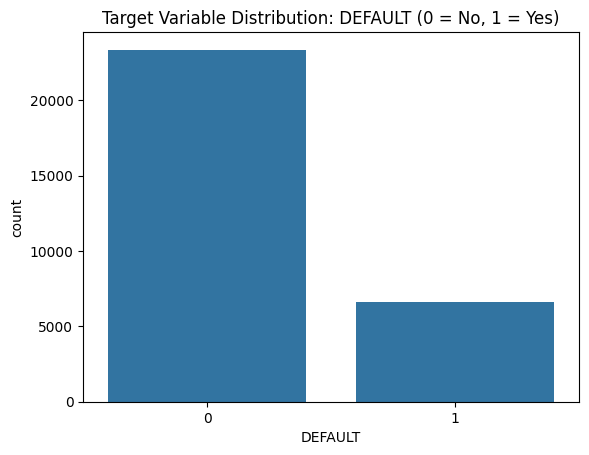

DEFAULT
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [38]:
sns.countplot(x='DEFAULT', data=df)
plt.title("Target Variable Distribution: DEFAULT (0 = No, 1 = Yes)")
plt.show()

df['DEFAULT'].value_counts(normalize=True)

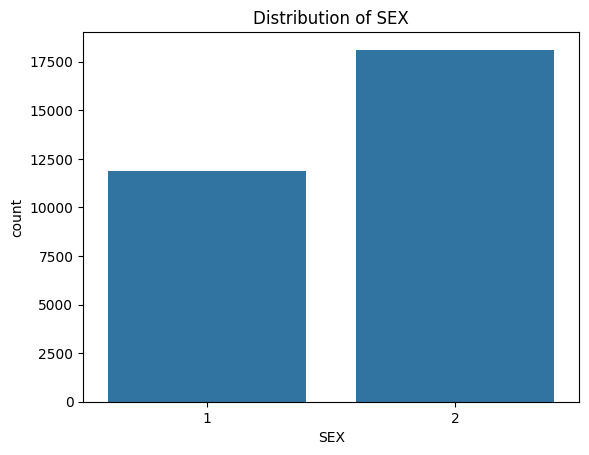

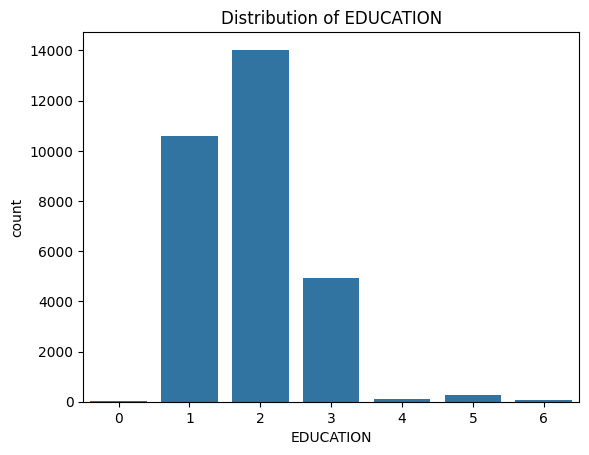

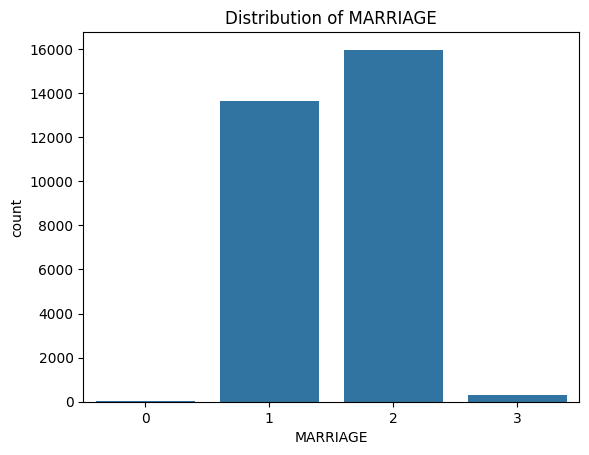

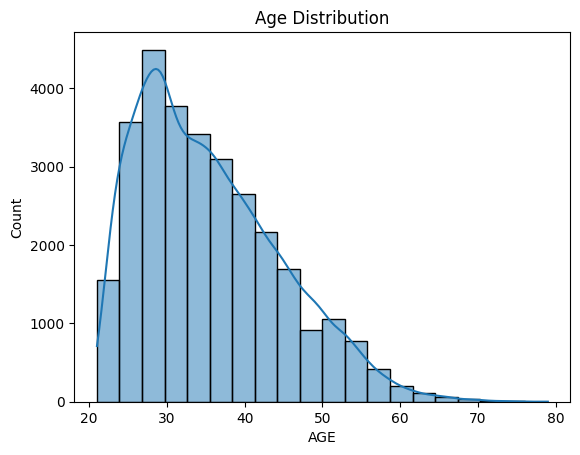

In [39]:
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in categorical_vars:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

sns.histplot(df['AGE'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()


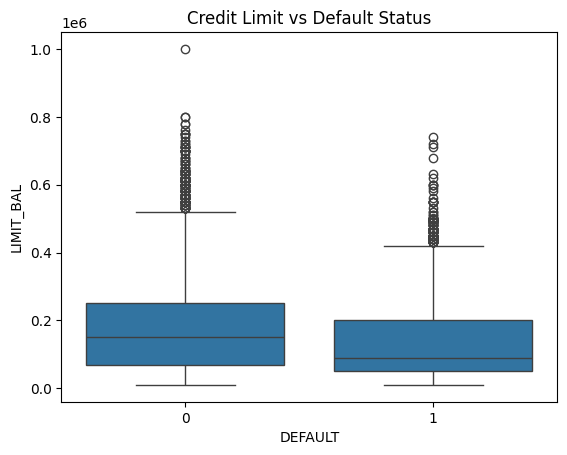

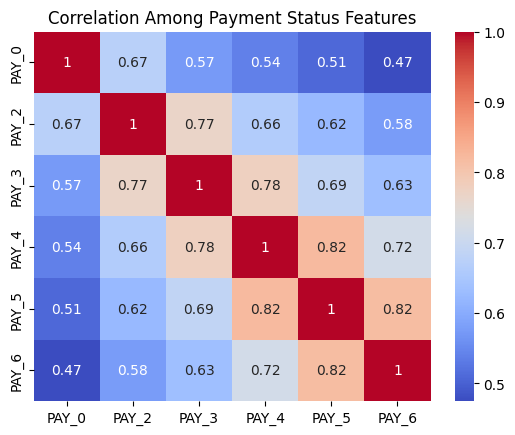

In [40]:
sns.boxplot(x='DEFAULT', y='LIMIT_BAL', data=df)
plt.title("Credit Limit vs Default Status")
plt.show()

# Payment history heatmap
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
sns.heatmap(df[pay_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Among Payment Status Features")
plt.show()


<Axes: title={'center': 'Average Bill Amounts Over Months'}>

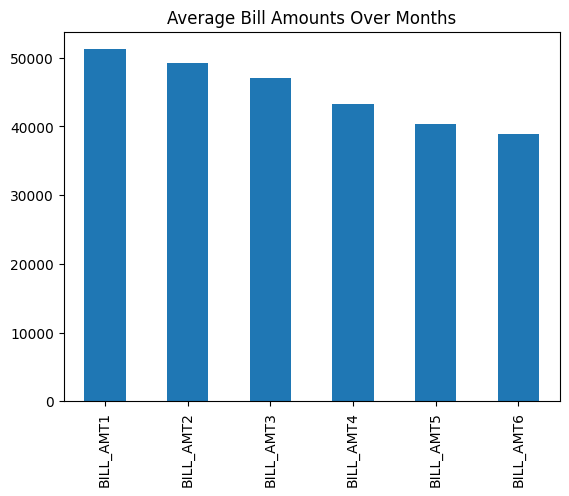

In [41]:
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df[bill_cols].describe().T

df[bill_cols].mean().plot(kind='bar', title="Average Bill Amounts Over Months")


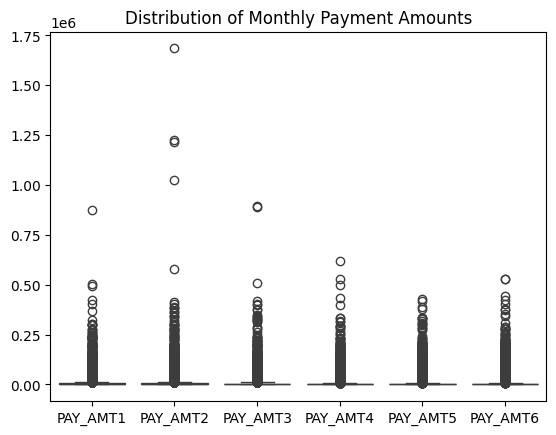

In [42]:
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
sns.boxplot(data=df[pay_amt_cols])
plt.title("Distribution of Monthly Payment Amounts")
plt.show()

<Axes: xlabel='DEFAULT', ylabel='AGE'>

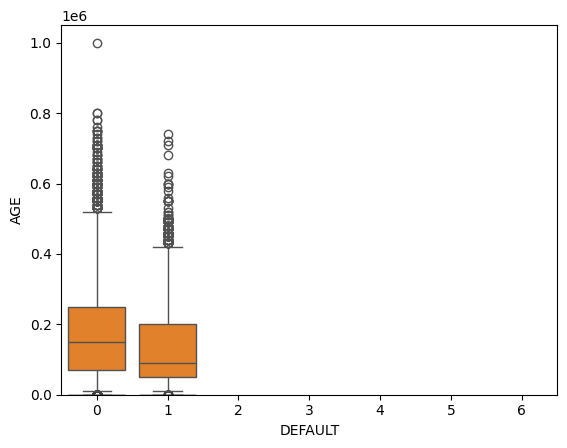

In [43]:
sns.boxplot(x='DEFAULT', y='AGE', data=df)

<Axes: xlabel='DEFAULT', ylabel='LIMIT_BAL'>

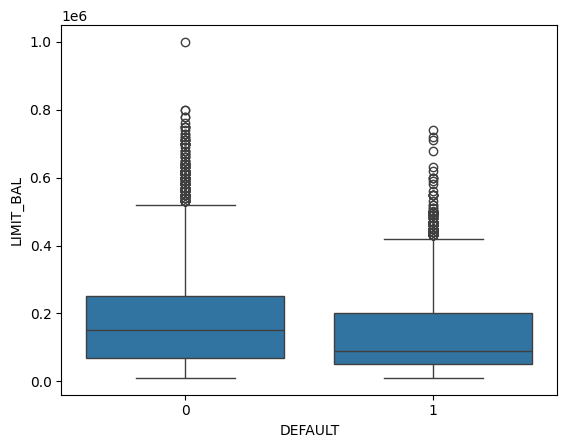

In [44]:
sns.boxplot(x='DEFAULT', y='LIMIT_BAL', data=df)

<Axes: xlabel='EDUCATION', ylabel='DEFAULT'>

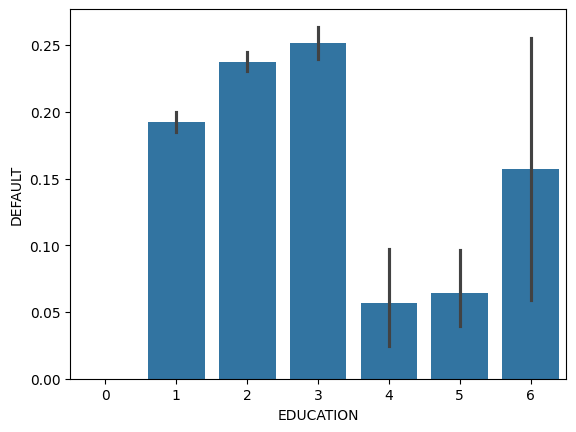

In [45]:
sns.barplot(x='EDUCATION', y='DEFAULT', data=df)

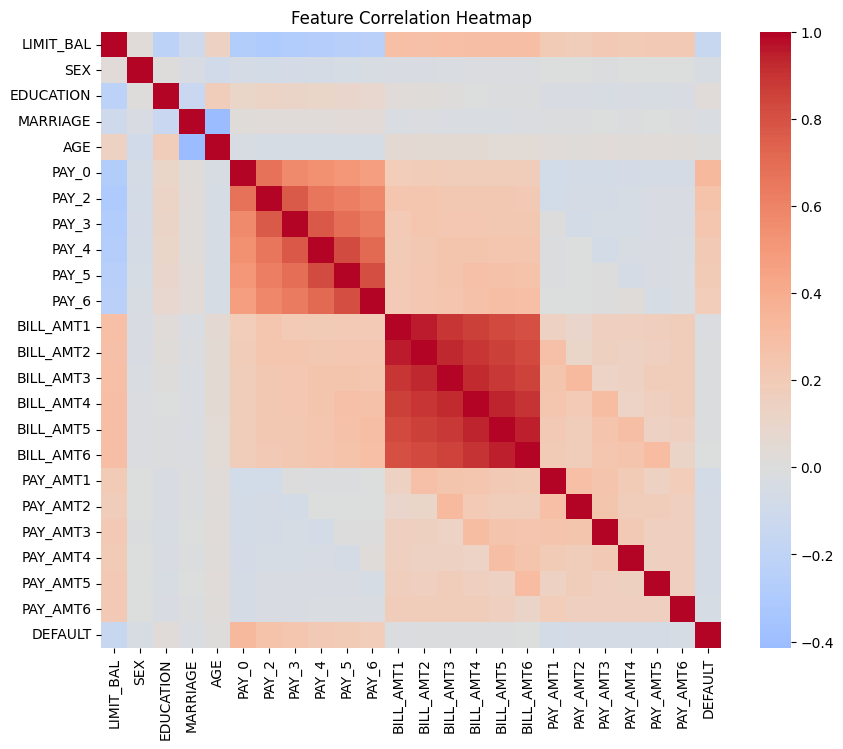

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [48]:
df.to_csv("credit_default_cleaned.csv", index=False)